<a href="https://colab.research.google.com/github/Raghulram97/codsoft-task-1/blob/main/Tinaticproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data collection/loading and processing




In [ ]:
titanic_data = pd.read_csv("/content/titanic.csv")


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data.shape

(418, 12)

In [ ]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [ ]:
#replacing missing values with mean number
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
#lets fix embarked
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
#replace the mode value with the missing value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


# Analysing the data

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [ ]:
#visualizing data
sns.set()

<Axes: ylabel='count'>

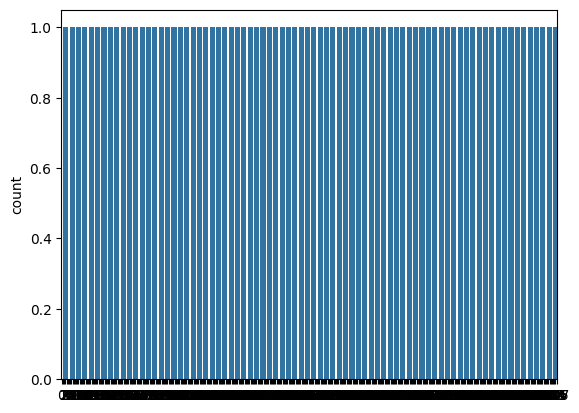

In [ ]:
sns.countplot(titanic_data['Survived'])

In [ ]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,266
female,152


<Axes: xlabel='count', ylabel='Sex'>

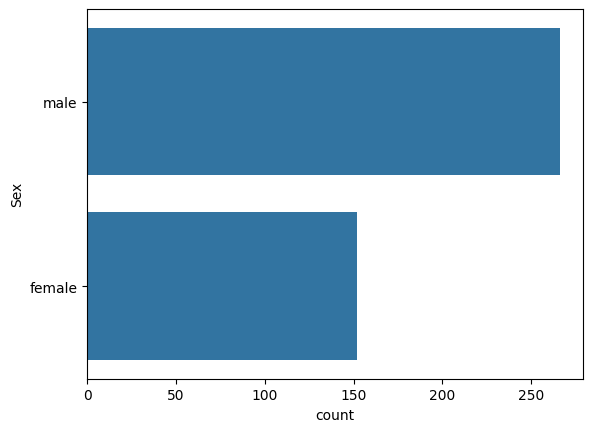

In [ ]:
#count plot for "sex" column
sns.countplot(titanic_data['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

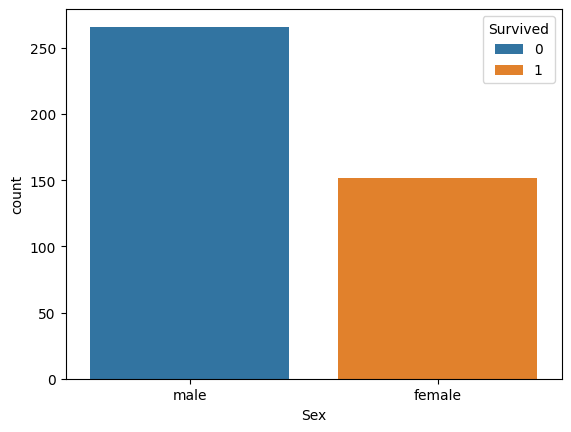

In [ ]:
#Analysing Gendet wise survivors
sns.countplot(x='Sex' , hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

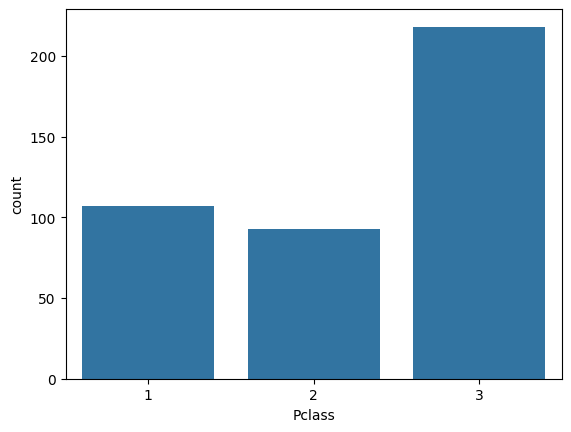

In [ ]:
#count plot for "pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

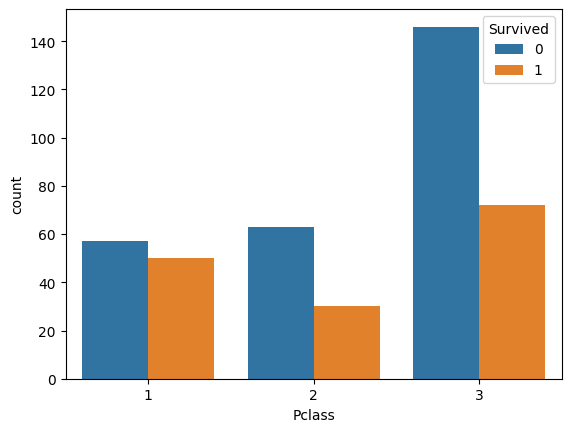

In [ ]:
sns.countplot(x='Pclass' , hue='Survived' , data=titanic_data)

# Encode Categorical Columns/data

In [ ]:
titanic_data['Sex'].value_counts()


,count
Sex,
male,266
female,152


In [ ]:
pd.get_dummies(titanic_data['Sex']).head()

,female,male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False


In [ ]:
Sex=pd.get_dummies(titanic_data['Sex']).head()
Sex.head(3)



,female,male
0,False,True
1,True,False
2,False,True


In [ ]:
embark=pd.get_dummies(titanic_data['Embarked'])

In [ ]:
embark.head(3)


,C,Q,S
0,False,True,False
1,False,False,True
2,False,True,False


In [ ]:
embark=pd.get_dummies(titanic_data['Embarked'], drop_first=True)

In [ ]:
embark.head(3)

,Q,S
0,True,False
1,False,True
2,True,False


In [ ]:
pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcl.head(3)

,2,3
0,False,True
1,False,True
2,True,False


In [ ]:
#our data is now converted into categorical data


In [ ]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [ ]:
# deleting the unwanted columns

In [ ]:
titanic_data.drop(['Name', 'PassengerId', 'Pclass', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
titanic_data.head(3)

,Survived,Age,SibSp,Parch,Fare
0,0,34.5,0,0,7.8292
1,1,47.0,1,0,7.0000
2,0,62.0,0,0,9.6875


# Train data

In [ ]:
from re import X
X=titanic_data.drop('Survived', axis=1)
y=titanic_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=4)

In [ ]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare
0,0,34.5,0,0,7.8292
1,1,47.0,1,0,7.0000
2,0,62.0,0,0,9.6875
3,0,27.0,0,0,8.6625
4,1,22.0,1,1,12.2875
